In [1]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
from itertools import combinations
from scipy.stats import pearsonr

In [2]:
save_dir = (
    '/Users/greg/Dropbox (HMS)/Baker_QC_2021/script_output/last_minute_figures/CD4')
if not os.path.exists(save_dir):
    os.makedirs(save_dir)

# SARDANA
df = pd.read_parquet(
    '/Volumes/T7 Shield/cylinter_input/sardana-097/output_raw/'
    'checkpoints/clustering.parquet'
    )
channels1 = [
    'anti_CD3', 'Keratin_570', 'aSMA_660', 'PD1_647', 'CD20_488', 'CD68_555',
    'CD8a_660', 'CD163_488', 'FOXP3_570', 'PDL1_647', 'Ecad_488',
    'Vimentin_555', 'CDX2_647', 'LaminABC_488', 'Desmin_555', 'CD31_647',
    'PCNA_488', 'CollagenIV_647', 'CD4_488', 'CD45_PE', 'anti_CD45RO',
    ]
channels2 = ['CD4_488', 'CD45_PE', 'anti_CD45RO']

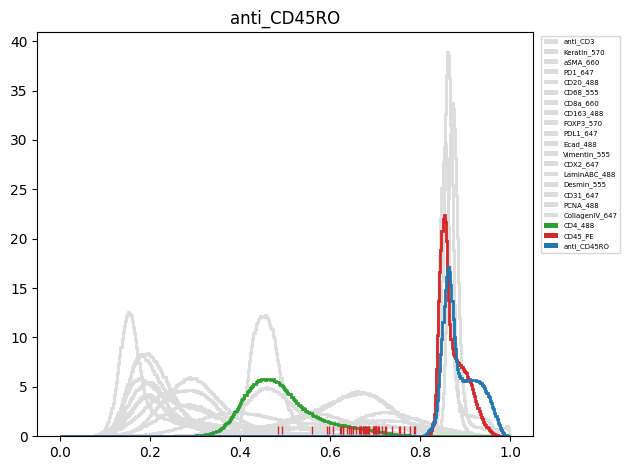

In [3]:
fig, ax = plt.subplots()
handles = []
for channel in channels1:

    if channel == 'CD4_488':
        c = 'tab:green'
    elif channel == 'CD45_PE':
        c = 'tab:red'
    elif channel == 'anti_CD45RO':
        c = 'tab:blue'
    else:
        c = 'gainsboro'

    g = ax.hist(
        df[channel], bins=400, density=True, histtype='step',
        linewidth=2.0, alpha=1.0, color=c
        )
    ax.set_title(channel)

    # add rug plot for specific cluster/channel
    if channel == 'CD4_488':
        y_max = plt.gca().get_ylim()[1]
        test = df[df['cluster_2d'] == 3]
        test = test.sample(n=50)
        for i in test.index:
            plt.plot(
                df[channel][df.index == i], y_max*0.015,
                marker='|', color='tab:red'
                )

    color = g[2][0].get_facecolor()[:-1]
    handles.append(
        Rectangle((0, 0), 1, 1, color=color, alpha=1.0, linewidth=0.0)
        )

plt.legend(handles, channels1, fontsize=5.0, bbox_to_anchor=(1.01, 1.0))
plt.tight_layout()
plt.savefig(os.path.join(save_dir, 'sardana.pdf'))
plt.show()
plt.close('all')

CD4_488


/Users/greg/venvs/cylinter/lib/python3.11/site-packages/matplotlib/text.py:1419: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  x = float(self.convert_xunits(x))
/Users/greg/venvs/cylinter/lib/python3.11/site-packages/matplotlib/text.py:1419: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  x = float(self.convert_xunits(x))


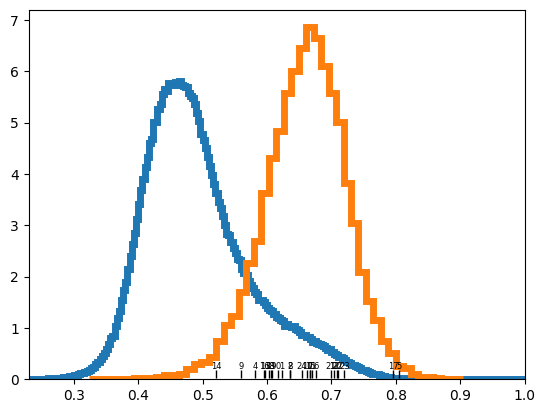

CD45_PE


/Users/greg/venvs/cylinter/lib/python3.11/site-packages/matplotlib/text.py:1419: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  x = float(self.convert_xunits(x))


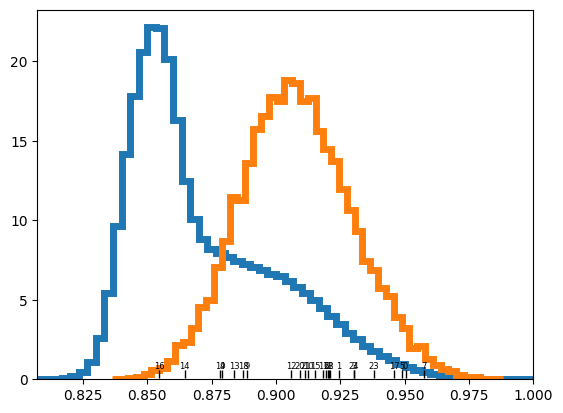

anti_CD45RO


/Users/greg/venvs/cylinter/lib/python3.11/site-packages/matplotlib/text.py:1419: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  x = float(self.convert_xunits(x))


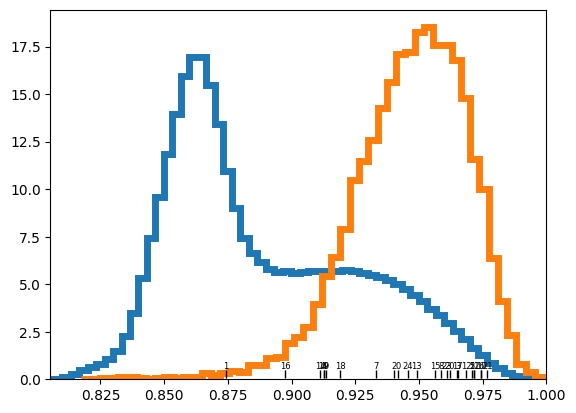

In [4]:
cluster = df[df['cluster_2d'] == 3]
cluster.set_index('CellID', inplace=True)

# CellIDs selected by curateThumbnails modules in CyLinter for SARDANA-097 raw
examples = [
    41060, 1097589, 464713, 503745, 808624, 468824, 413086, 9974, 972474,
    1229834, 209828, 664140, 183871, 515864, 509302, 108317, 437627, 481101,
    878465, 697962, 936016, 82322, 237841, 252763, 485627
    ]
example_dict = dict(zip(examples, [examples.index(i) for i in examples]))

handles = []
for channel in channels2:

    print(channel)

    cutoff = np.percentile(df[channel], q=0.01)

    plt.hist(
        df[channel], bins=300, density=True, histtype='step',
        linewidth=5.0, alpha=1.0
        )

    plt.hist(
        cluster[channel], bins=50, density=True, histtype='step',
        linewidth=5.0, alpha=1.0
        )

    plt.xlim([cutoff, 1.0])

    y_max = plt.gca().get_ylim()[1]

    # add and annotate rug plot
    for i in examples:
        plt.plot(
            cluster[channel][cluster.index == i], y_max*0.015,
            marker='|', color='k',
            )

        label = example_dict[i]
        plt.annotate(
            f'{label}',
            (cluster[channel][cluster.index == i], y_max*0.03),
            textcoords='offset points', xytext=(0, 0), ha='center',
            fontsize=6
            )

    plt.savefig(os.path.join(save_dir, f'{channel}_crop.pdf'))
    plt.show()
    plt.close('all')

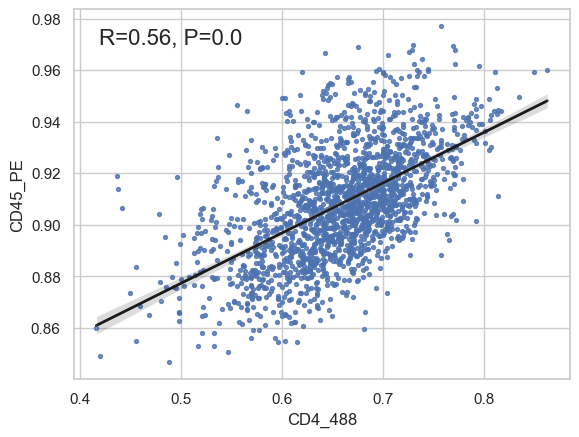

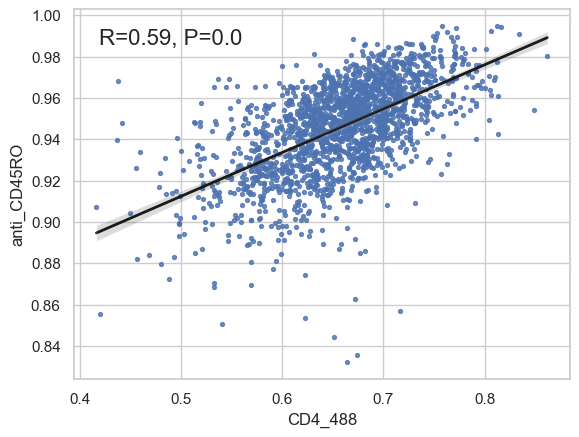

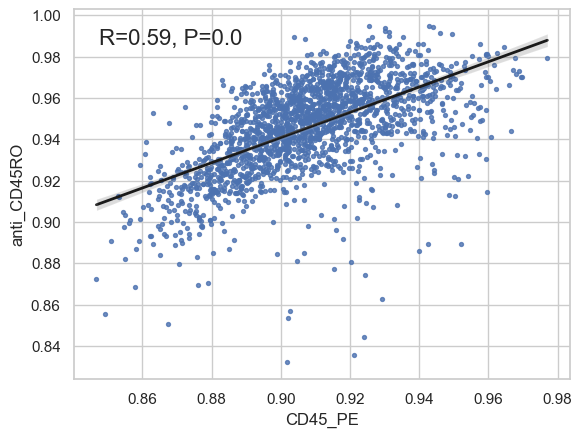

In [16]:
# compute Pearsonr scores and plot

# random state 1
examples = [
    41060, 1097589, 464713, 503745, 808624, 468824, 413086, 9974, 972474, 1229834, 209828, 664140, 183871, 
     515864, 509302, 108317, 437627, 481101, 878465, 697962, 936016, 82322, 237841, 252763, 485627, 253354, 
     169848, 474560, 184540, 1191836, 1230320, 180540, 749964, 363982, 349958, 1045376, 34467, 384912, 
     779866, 207754, 872597, 1203802, 783549, 382118, 93089, 409466, 804695, 275709, 452786, 499198, 653474, 
     503581, 561803, 126026, 374726, 1143446, 1162651, 1219690, 353365, 1132231, 564770, 191511, 475907, 
     1228734, 115853, 408433, 1207564, 224206, 696761, 990434, 974651, 762378, 1086712, 307458, 1192367, 
     941249, 99613, 825840, 361583, 269815, 855709, 966988, 151584, 1048779, 212480, 419987, 386114, 1132579, 
     524555, 957093, 568221, 367902, 508571, 592756, 6545, 340018, 854420, 1098210, 1235120, 844475, 704161, 
     1201233, 671063, 1147374, 1230724, 331854, 736477, 521733, 222709, 499287, 986065, 692644, 662156, 511399, 
     934053, 854140, 253481, 14546, 761052, 872863, 487619, 41203, 316436, 207075, 525742, 1143997, 656286, 
     348569, 1231191, 480615, 1152914, 752937, 459213, 14251, 513498, 616730, 1065015, 375545, 445862, 473284, 
     1196858, 348576, 34335, 684186, 546876, 302686, 1153735, 623672, 747020, 1175908, 1008605, 950236, 1221304, 
     1023742, 311846, 427425, 785348, 270492, 753582, 610240, 489755, 1002579, 969835, 992856, 588206, 657190, 
     364746, 503082, 215559, 540328, 170022, 529485, 358435, 740453, 1187145, 763913, 914625, 512110, 471297, 
     1159346, 501338, 383858, 548530, 1002670, 984778, 636690, 808447, 1222780, 461407, 429472, 336196, 1091665, 
     1110543, 833701, 513016, 1152658, 376937, 163633, 868127, 1095462, 356410, 508195, 284580, 1091326, 712751, 
     186826, 364840, 440767, 732964, 390001, 549273, 1111111, 386424, 55345, 1103305, 1169352, 1176905, 1017229, 
     450820, 1197598, 386292, 1071382, 461288, 889988, 1025781, 1137211, 1143867, 606004, 807082, 1222629, 
     729839, 152597, 1186090, 1150604, 415044, 632637, 1205058, 874869, 230519, 778072, 648170, 660816, 298645, 
     416113, 710841, 1172215, 1031183, 608467, 17184, 510031, 759610, 517075, 494152, 671302, 147899, 282321, 
     1005370, 225, 457055, 499733, 137999, 877593, 1118343, 500865, 399053, 379042, 389495, 1101657, 349113, 
     927297, 368455, 1123861, 915597, 1067247, 10814, 1096373, 433909, 1182533, 808399, 365191, 465429, 627015, 
     635590, 184019, 208209, 302293, 688129, 450309, 967248, 417020, 1176440, 1009261, 500955, 527299, 178700, 
     138015, 845789, 329052, 1126803, 525532, 421136, 485351, 939338, 701309, 1118747, 860311, 1057400, 492879, 
     392817, 375802, 327071, 462100, 187129, 428809, 486917, 900489, 752141, 1235389, 13369, 300008, 1154494, 
     990244, 517822, 60065, 312777, 451637, 541319, 954484, 637448, 354974, 828332, 203075, 897353, 643251, 
     444424, 1028785, 300630, 656293, 506444, 712080, 936583, 725011, 322984, 476408, 302925, 709642, 456635, 
     468578, 1148069, 892233, 740257, 288935, 847741, 1022636, 538849, 298072, 754484, 296603, 963966, 135534, 
     1151710, 396831, 902833, 980886, 477891, 913416, 512464, 739866, 1207157, 989662, 192481, 413161, 847732, 
     414419, 1226780, 381752, 1042220, 435574, 466739, 507794, 712750, 894893, 710116, 354849, 808254, 494800, 
     127861, 289326, 642764, 824587, 1068616, 613521, 946977, 378051, 737279, 642065, 823807, 1121193, 1198703, 
     1021392, 274933, 160662, 1151283, 1172895, 817003, 212695, 928235, 100660, 1208378, 917084, 471965, 488245, 
     533620, 29103, 511203, 528815, 468246, 173057, 872601, 418163, 43919, 1038152, 493185, 742333, 531052, 
     492257, 730542, 540946, 869370, 449944, 292898, 1005892, 709890, 1061641, 623745, 1149437, 1017065, 576425, 
     1069652, 288753, 512943, 841852, 473744, 1239342, 1061428, 1237911, 571713, 269364, 145911, 880683, 
     1109844, 689050, 87768, 168711, 929194, 681575, 584021, 650699, 496198, 1072347, 933933, 499667, 107696, 
     408195, 278778, 776833, 842246, 316142, 32136, 464122, 731525, 765387, 995801, 447460, 1142790, 178764, 
     531310, 342540, 1070562, 429498, 1236853, 728862, 151920, 601851, 1211050, 95587, 1072265, 1095346, 532035, 
     539354, 214149, 1116324, 441026, 702081, 399349, 935826, 411337, 197565, 366375, 826101, 890174, 987947, 
     445654, 579030, 144481, 1126090, 410819, 988831, 574076, 942768, 292874, 196267, 772520, 366626, 982380, 
     697921, 234008, 1071095, 99840, 895231, 964860, 746855, 1081281, 1206620, 167542, 444351, 1095758, 858025, 
     1164673, 1084984, 717639, 546034, 776697, 269084, 910966, 542270, 484195, 716020, 205137, 986559, 204664, 
     1018718, 937999, 829210, 475767, 1086946, 439792, 178531, 417644, 20752, 286765, 965399, 507998, 498282, 
     451756, 331881, 426510, 287932, 1021581, 861282, 860353, 902413, 394173, 647888, 160870, 374381, 374115, 
     664111, 754483, 620781, 941598, 759139, 558050, 513934, 943703, 406863, 875054, 295891, 33657, 337129, 
     617337, 443461, 1220646, 1104000, 632283, 1079790, 505945, 994496, 682231, 1217681, 737744, 671247, 86956, 
     1119389, 742876, 761262, 372008, 386496, 1097052, 636803, 497406, 1168499, 467871, 455974, 1152471, 9221, 
     111694, 646435, 1050048, 70609, 220350, 438527, 1064336, 112176, 120057, 839644, 413337, 1215717, 534593, 
     508271, 668493, 874140, 301872, 661942, 465286, 181741, 705550, 1021596, 959899, 1079135, 472005, 235015, 
     480847, 387111, 957333, 551416, 219059, 475042, 255955, 1216588, 988096, 719561, 683030, 742405, 227753, 
     478101, 508997, 610368, 797558, 498051, 511267, 259681, 464080, 495805, 1130675, 777424, 388385, 357879, 
     348510, 452964, 903554, 707442, 262607, 365182, 500039, 885267, 48111, 534915, 437804, 657232, 840194, 
     739082, 832666, 942192, 1125212, 1213808, 401700, 355624, 1167375, 831742, 1221882, 815893, 858073, 873539, 
     857533, 648131, 515788, 501583, 710960, 947764, 603037, 465818, 294371, 161635, 327328, 652799, 233029, 
     958413, 813883, 1065655, 451570, 178239, 117075, 468170, 1205221, 853754, 1146620, 401246, 485981, 262635, 
     1093613, 252015, 446611, 427631, 917626, 406896, 388057, 421230, 839590, 566950, 451396, 980131, 1150739, 
     283084, 1172808, 973546, 1123922, 209522, 883485, 1220912, 988875, 866823, 140485, 767881, 527080, 468397, 
     29329, 199404, 1008924, 1009519, 991489, 141064, 414438, 375300, 2757, 399683, 371857, 621036, 879740, 
     657093, 510281, 138060, 394524, 390693, 877269, 527605, 382041, 468750, 848025, 1055799, 730216, 168217, 
     1206104, 586622, 412592, 994820, 977503, 1052445, 482383, 874176, 1048285, 562382, 38077, 833968, 1129760, 
     945820, 462836, 748000, 963123, 504168, 178291, 835352, 502630, 635288, 511583, 536019, 526452, 577024, 
     797638, 611574, 1060680, 851138, 1156236, 813038, 397575, 998083, 127418, 510591, 471817, 322608, 978225, 
     524297, 950817, 1163908, 720589, 538681, 1001959, 406183, 1196927, 935677, 1154088, 282548, 676098, 390794, 
     915604, 279221, 763876, 1073426, 458170, 658964, 468565, 966568, 190808, 340478, 735257, 694796, 309281, 
     892192, 760478, 955072, 341575, 186554, 1119883, 265232, 984216, 1105210, 81701, 489676, 447278, 831766, 
     927182, 398388, 475441, 395432, 707096, 398962, 320620, 1042054, 860051, 564176, 499657, 469213, 866972, 
     1215828, 1166711, 375911, 797167, 327912, 964827, 132004, 82931, 64184, 526505, 1224271, 468626, 383029, 
     103387, 1198065, 501451, 953409, 536639, 443169, 854322, 1091216, 24469, 706511, 302836, 385340, 949195, 
     818356, 433891, 844623, 704633, 694026, 945428, 258201, 889899, 460812, 132099, 937949, 724439, 304121, 
     1003049, 509776, 658967, 211900, 824824, 437410, 435991, 242539, 391205, 470991, 628602, 645739, 950218, 
     486471, 837057, 875854, 512814, 201002, 625864, 801486, 831201, 462883, 512419, 766407, 509085, 119168, 
     711266, 377876, 349625, 305981, 449518, 478097, 1206313, 603796, 499241, 1085296, 898052, 687629, 479057, 
     836242, 839453, 412961, 438264, 1037888, 721348, 473340, 804949, 867683, 475271, 178847, 1217929, 987156, 
     548747, 885150, 739185, 973890, 606748, 881426, 648612, 509684, 1218498, 126603, 1035627, 436760, 897829, 
     603053, 665279, 1143439, 802115, 502242, 1181417, 1237501, 789369, 492182, 989993, 664640, 277575, 485878, 
     1137391, 480831, 1215652, 306478, 1082873, 880611, 822495, 1053833, 703086, 965974, 430485, 645886, 859771, 
     397847, 1011311, 835277, 769101, 736909, 1231809, 1195409, 141821, 1003757, 796432, 356709, 1223535, 22624, 
     159599, 738724, 500739, 952487, 357895, 314994, 1123530, 990506, 411232, 243771, 787046, 1087197, 549494, 
     52660, 503834, 961834, 301177, 600294, 1087477, 344655, 1020613, 966873, 968320, 661939, 1096028, 130217, 
     225832, 465439, 945872, 228906, 929636, 1184695, 527389, 95948, 983582, 1156082, 341271, 1241345, 388842, 
     384242, 136751, 507721, 397280, 208175, 931157, 430195, 466597, 42380, 1082353, 1185183, 1106935, 317390, 
     580953, 10668, 942919, 923995, 350175, 969597, 237314, 501634, 390892, 1073652, 903555, 716303, 1103620, 
     133236, 915433, 457427, 1076970, 127266, 288830, 189666, 1096993, 977877, 174467, 1057511, 798564, 1155361, 
     191108, 329841, 22942, 795419, 1189236, 1008006, 1129872, 354193, 682298, 970784, 149279, 734894, 483869, 
     718099, 603227, 1219129, 487781, 158642, 10524, 377788, 310952, 530499, 943352, 658830, 754629, 1067662, 
     1195606, 354747, 1194436, 1010446, 696756, 872131, 303741, 762052, 1130388, 755616, 356795, 921569, 1157143, 
     509294, 328144, 1086288, 574756, 814760, 451764, 706893, 1192132, 533235, 363762, 368122, 93175, 1085676, 
     19143, 247012, 1223570, 428456, 776940, 110112, 530091, 1011763, 600178, 961804, 522663, 204135, 1220293, 
     179548, 403455, 300040, 467913, 483105, 1057047, 147827, 1164192, 652498, 79175, 403289, 282720, 122856, 
     489545, 480148, 832238, 131784, 242076, 1009169, 1207909, 1005451, 1113915, 779246, 667115, 685718, 249664, 
     1013848, 656592, 746931, 1172381, 1046916, 393308, 920729, 868945, 572330, 675602, 425535, 1049534, 302116, 
     566464, 966355, 514436, 749578, 220045, 762747, 308378, 1017602, 380178, 1056028, 426068, 987362, 245674, 
     201260, 854221, 151703, 412814, 204413, 986004, 1124800, 989538, 280360, 268688, 830788, 521489, 559706, 
     486915, 764565, 945029, 824681, 841236, 419536, 496287, 400576, 304613, 34230, 755997, 7057, 476738, 424836,
     266821, 787875, 398607, 968868, 472487, 723592, 791544, 816328, 1143143, 531087, 807406, 908866, 1028353, 
     292333, 1041551, 450860, 965512, 1214351, 10028, 504450, 674528, 1206077, 482244, 959397, 656453, 605047, 
     753726, 851074, 704704, 847857, 678681, 1007659, 374701, 527878, 315233, 8999, 989930, 1188647, 961684, 
     242295, 499820, 946218, 386833, 112806, 1067051, 413644, 526855, 1110596, 399867, 966750, 1213802, 901112, 
     568242, 408502, 231867, 824157, 682747, 1176503, 513780, 407141, 238480, 16677, 409652, 863655, 431177, 
     1176685, 203971, 274383, 486559, 1085413, 1152712, 393564, 280897, 464646, 960028, 864651, 963791, 772662, 
     1023963, 474717, 451941, 125648, 907291, 749633, 344415, 1050680, 497322, 989641, 825428, 377217, 474481, 
     483854, 458678, 1154314, 1056367, 322156, 442474, 1037349, 439719, 255440, 625039, 573456, 239376, 1026961, 
     1039347, 693048, 1107944, 644976, 809849, 441374, 137568, 429202, 373863, 497321, 129029, 503907, 418056, 
     686526, 1058893, 362335, 758967, 284252, 814192, 836870, 468713, 83767, 275751, 955387, 814743, 480534, 
     1229546, 379327, 143147, 944864, 1185786, 404577, 884225, 1224713, 275512, 1193681, 385594, 957770, 558502, 
     1237353, 504531, 1128970, 131547, 1015890, 834813, 370974, 972077, 533836, 500772, 872358, 438879, 789932, 
     1155908, 973648, 699995, 163508, 887414, 8840, 692352, 950448, 877200, 985544, 1201558, 401450, 874742, 
     1068771, 518901, 235134, 679883, 370782, 487626, 974701, 1159158, 221020, 189982, 826950, 1010956, 1015007, 
     662268, 767962, 600101, 415069, 391269, 572321, 1001084, 598970, 800510, 1012550, 473535, 424036, 1084275, 
     993116, 508421, 1124888, 663374, 750726, 1183029, 1113442, 774284, 44411, 226744, 1074229, 595707, 768716, 
     1118320, 1185405, 446307, 318997, 545884, 886883, 461094, 476729, 1029742, 1202653, 576268, 15048, 504385, 
     1040881, 236224, 842041, 1197686, 803393, 680478, 319162, 929355, 525701, 1087725, 1001025, 993601, 802621, 
     1013927, 491215, 366500, 391085, 913153, 879293, 1007206, 425050, 891487, 136973, 448234, 532090, 139729, 
     150452, 93614, 167644, 1005640, 356450, 1079428, 997911, 1231389, 963252, 354359, 658624, 589210, 412945, 
     884064, 871115, 489140, 236603, 1090063, 220654, 416719, 770453, 287839, 396805, 865204, 1005345, 765759, 
     407092, 228579, 922036, 1203350, 396376, 1027430, 347545, 686064, 336252, 679374, 360922, 922153, 392196, 
     708223, 389454, 364440, 1174822, 995963, 407284, 312155, 318218, 1201041, 379446, 127819, 1098577, 971217, 
     853836, 183071, 435335, 1161738, 994277, 971826, 189664, 1168734, 286080, 510841, 1208151, 509038, 427989, 
     1094350, 406912, 1061312, 469325, 939303, 1142828, 956365, 979893, 818626, 828880, 437362, 1114889, 705291, 
     976306, 1137360, 67389, 721494, 735928, 951066, 373852, 1001957, 1197584, 193000, 734842, 477179, 1190953, 
     682395, 92742, 705690, 1169172, 366338, 388324, 451889, 447890, 498389, 353468, 1135825, 469387, 626509, 
     470211, 761561, 126822, 512688, 968164, 520926, 1004889, 158796, 1130736, 1106316, 490058, 8293, 636077, 
     982658, 401977, 54861, 1034817, 59544, 853711, 1063502, 374225, 834612, 256722, 526843, 744490, 669978, 
     1020596, 1208694, 319394, 437041, 1163821, 676776, 1132561, 989420, 740037, 525870, 544802, 969975, 420495, 
     237415, 748459, 142391, 477281, 743129, 794642, 200419, 412100, 175395, 494886, 867505, 559796, 108626, 
     876742, 209553, 705426, 739954, 833233, 210078, 181753, 1047906, 472615, 14867, 479250, 420593, 788210, 
     147931, 690052, 452776, 231445, 830500, 1027793, 874031, 891329, 435858, 309532, 716478, 1011642, 736772, 
     1079426, 472187, 444385, 41936, 477225, 433897, 848252, 526369, 389915, 368340, 742537, 906929, 549796, 
     1221245, 424119, 416989, 746321, 1136525, 703971, 491503, 892574, 1095237, 715201, 495365, 266142, 844679, 
     510032, 223836, 434502, 152772, 775913, 752658, 876684, 516227, 1118692, 333009, 1088739, 1208818, 585678, 
     183157, 503470, 517023, 1182579, 430516, 453063, 916627, 556447, 732655, 798373, 70299, 688744, 1114658, 
     192585, 800123, 207447, 425869, 47609, 1124336, 163576, 418531, 743216, 316243, 345739, 402139, 152248, 
     236810, 355266, 595983, 1122233, 441142, 77471, 1216292, 424498, 539730, 1135367, 534729, 482772, 1200522, 
     1002672, 835488, 1027145, 634984, 426586, 820226, 547103, 425544, 542288, 502885, 533439, 996925, 880758, 
     1203605, 17012, 434998, 732126, 243181, 496884, 1132957, 583010, 1012617, 582723, 224781, 483826, 24380, 
     559037, 656506, 1154572, 371755, 537761, 419196, 86212, 477439, 108450, 921504, 312761, 215252, 282109, 
     769670, 944519, 1218681, 316344, 494488, 240086, 152973, 1034562, 40976, 315232, 912487, 475908, 441224, 
     235038, 309689, 712113, 9875, 44941, 1091770, 627746, 581717, 491479, 1006620, 697768, 1128326, 584336, 
     905699, 680479, 459701, 712854, 505767, 343381, 655991, 392996, 417065, 481546, 871594, 278418, 878462, 
     1231047, 413437, 210070, 324221, 518694, 725459, 419341, 1203409, 361534, 1068777, 270824, 417371, 364811, 
     858138, 667626, 1006660, 454006, 1135282, 454124, 1113548, 808400, 982679, 136791, 337410, 310381, 949620, 
     136354, 1115940, 1080226, 446626, 108978, 413089, 1198115, 159474, 241804, 184543, 1083344, 235068, 484106, 
     437433, 547847, 877045, 538015, 1111679, 1143293, 742941, 736831, 533255, 313122, 996634, 100177, 1116121, 
     428723, 765948, 878094, 1126680, 707807, 712036, 975176, 453210, 886464, 1156469, 257013, 915033, 1044249, 
     388735, 1111158, 399004, 689803, 762923, 838834, 554375, 800427, 760157, 233552, 471412, 1103027, 131282, 
     989461, 1113334, 1139245, 1014123, 376571, 1140633, 443538, 1083527, 681585, 505520, 539979, 390586, 813454, 
     1226581, 444302, 1134604, 423009, 943379, 346158
]
example_dict = dict(zip(examples, [examples.index(i) for i in examples]))

sns.set(font_scale=1)
sns.set_style('whitegrid')
stats = pd.DataFrame(columns=['combo', 'pearsonr', 'pval'])
for e, i in enumerate(combinations(channels2, r=2)):

    ch1 = i[0]
    ch2 = i[1]

    stats.loc[e, 'combo'] = i

    x = cluster[ch1][cluster.index.isin(examples)]
    y = cluster[ch2][cluster.index.isin(examples)]
    res, pval = pearsonr(x=x, y=y, alternative='two-sided')

    stats.loc[e, 'pearsonr'] = res
    stats.loc[e, 'pval'] = pval

    regplot = pd.DataFrame(index=x.index, columns=[ch1, ch2])
    regplot.loc[:, ch1] = x.values
    regplot.loc[:, ch2] = y.values

    regplot[ch1] = regplot[ch1].astype('float')
    regplot[ch2] = regplot[ch2].astype('float')
    
    fig, ax = plt.subplots()
    
    sns.regplot(
        x=ch1,  y=ch2, data=regplot, scatter=True, ax=ax,
        scatter_kws={'s': 8},
        line_kws={'color': 'k', 'alpha': 1.0, 'lw': 2.0, 'zorder': 1}
        )

    # annotate regplot ticks
    # for row in regplot.iterrows():
    #     idx = row[0]
    #     val = row[1]
    #     label = example_dict[idx]
    #     plt.annotate(
    #         f'{label}', (row[1][0], row[1][1]), textcoords='offset points',
    #         xytext=(4.5, 4.5), ha='center', fontsize=12
    #         )

    # add Pearson R and P-value to plot
    ax.text(
        0.05, 0.95, f'R={round(res, 2)}, P={round(pval, 5)}',
        transform=ax.transAxes, fontsize=16, va='top', ha='left'
        )

    plt.savefig(os.path.join(save_dir, f'{i}.pdf'))
    plt.show()
    plt.close('all')